**Flip_it news text classification**

**Objective :**

Use the extensive company's data base of news articles and categorize them into different categories with the help of Natural language processing and compare different classification models perfomances

**importing librabries :**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**importing and exploring the data**

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the data
df = pd.read_csv('/content/drive/My Drive/flipitnews-data.csv')

In [ ]:
df.sample(12)

,Category,Article
442,Sports,scotland 18-10 italy six chris paterson penalt...
856,Entertainment,double eviction from big brother model caprice...
1969,Sports,juninho demand for o neill talks juninho s age...
1990,Politics,tories opposing 24-hour drinking the tories sa...
1952,Business,worldcom trial starts in new york the trial of...
608,Politics,probe launched on ken nazi jibe an investigati...
1517,Politics,tory backing for id cards the tories are to ba...
1470,Sports,bekele sets sights on world mark olympic 10 00...
615,Technology,gadgets galore on show at fair the 2005 consum...
11,Business,virgin blue shares plummet 20% shares in austr...


In [ ]:
print(f'no.of rows : {df.shape[0]} , no.of columns {df.shape[1]}')

no.of rows : 2225 , no.of columns 2


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df["article"][0].islower()

True

**Checking whether the "article" feature contains all lower_case or not**

In [ ]:
def lower_check(x):
    return x.islower()

In [ ]:
df["article"].apply(lower_check).all()

True

all the news articles are str data type and lower case

In [ ]:
df.info()
# both the features are str datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df["category"].value_counts()

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: category, dtype: int64

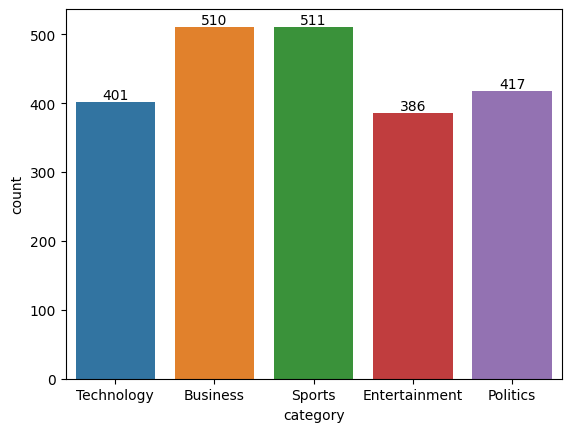

In [ ]:
ax= sns.countplot(data=df,x="category")
ax.bar_label(ax.containers[0])
plt.show()

Business and sports articles have highest count

**Text_preprocessing**

In [ ]:
# we already check whether the articles format is lower or not.
stop_words = stopwords.words('english')
# 1. cleaning , 2. tokenize ,  stopwords  , 3. lemmetisation
def text_pre_process(sentence):

  sentence = re.sub('[^a-zA-Z]', ' ',sentence)

  words = nltk.word_tokenize(sentence)

  filter_sentence = [each_word for each_word in words if each_word not in stop_words]

  lemmetizer = WordNetLemmatizer()

  lemmetizer_text =  [lemmetizer.lemmatize(each_word)  for each_word in filter_sentence]

  final_txt = ' '.join(lemmetizer_text)

  return final_txt

In [ ]:
df.columns

Index(['category', 'article'], dtype='object')

In [ ]:
df["article"] = df["article"].apply(text_pre_process)

We can see that some words are lemmatized and stop words are also removed

In [ ]:
df["article"][0]

'tv future hand viewer home theatre system plasma high definition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talked technology ce digital personal video recorder dvr pvr set top box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also built high definition tv set big business japan u slower take europe lack high definition programming people forward wind advert also forget abiding network channel schedule putting together la carte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty channel 

**Before building a model we need to enocode the target variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["category"] = le.fit_transform(df["category"])
df.head()

,category,article
0,4,tv future hand viewer home theatre system plas...
1,0,worldcom bos left book alone former worldcom b...
2,3,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle fa cup premiership side...
4,1,ocean twelve raid box office ocean twelve crim...


In [ ]:
df["category"].value_counts()

3    511
0    510
2    417
4    401
1    386
Name: category, dtype: int64

In [ ]:
# prompt: write a piece of code which takes two numbers as input , if number is 1 then apply countvectorizer with max features 5000 and fit the data , if number is 2 then apply tfidfvectorizer

inp = int(input("choose : 1. Count_vectorizer  or  2. tf idf"))

if inp ==1:
    vectorizer = CountVectorizer(max_features = 5000)
    vectorizer.fit(df["article"])
    x = vectorizer.transform(df["article"]).toarray()
    y= np.array(df['category'].values)
elif inp ==2 :
    vectorizer = TfidfVectorizer()
    vectorizer.fit(df["article"])
    x = vectorizer.transform(df["article"]).toarray()
    y= np.array(df['category'].values)
else :
    print("input is wrong")

print(inp)

choose : 1. Count_vectorizer  or  2. tf idf2
2


In [ ]:
x.shape

(2225, 24718)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)


In [ ]:
print(x_train.shape)
print(x_test.shape)


(1668, 24718)
(557, 24718)


**Model_building**

Let's build multinomial naive bayes and compare it's performance with the rest of the classification models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
y_pred_NB = NB.predict(x_test)

# Model evaluation
NB_accuracy = accuracy_score(y_test, y_pred_NB)
NB_precision = precision_score(y_test, y_pred_NB, average='weighted')
NB_recall = recall_score(y_test, y_pred_NB, average='weighted')
NB_f1 = f1_score(y_test, y_pred_NB, average='weighted')

print("Multinomial Naive Bayes:")
print("Accuracy:", NB_accuracy)
print("Precision:", NB_precision)
print("Recall:", NB_recall)
print("F1 score:", NB_f1)

Multinomial Naive Bayes:
Accuracy: 0.9694793536804309
Precision: 0.9705770668867946
Recall: 0.9694793536804309
F1 score: 0.9694967271160071


In [ ]:
y_pred_prob = NB.predict_proba(x_test)

In [ ]:
roc_auc_score(y_test,y_pred_prob,multi_class='ovr')

0.9993366253779433

**Plotting-confusion-matrix**

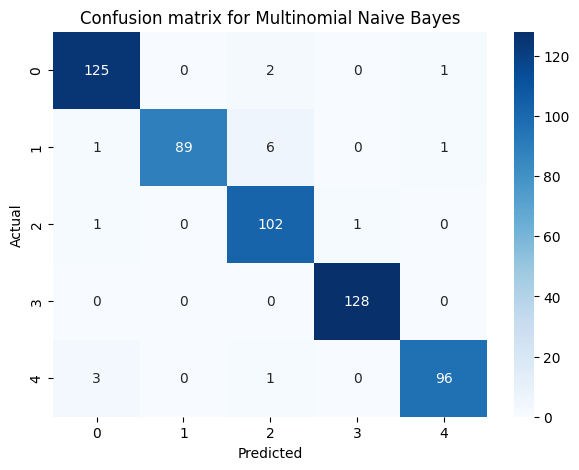

In [ ]:

cm = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Multinomial Naive Bayes')
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_NB))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       128
           1       1.00      0.92      0.96        97
           2       0.92      0.98      0.95       104
           3       0.99      1.00      1.00       128
           4       0.98      0.96      0.97       100

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



**Functionalising the above code so that It can applied to different classifiers**

In [ ]:
def model_classification(model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  # Model evaluation
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  print(f"{model.__class__.__name__}:")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 score:", f1)
  y_pred_prob = model.predict_proba(x_test)
  print("auc_roc_score",roc_auc_score(y_test,y_pred_prob,multi_class='ovr'))

**Decision-Tree**

In [ ]:
DT = DecisionTreeClassifier()
model_classification(DT)

DecisionTreeClassifier:
Accuracy: 0.8653500897666068
Precision: 0.866259282553924
Recall: 0.8653500897666068
F1 score: 0.8655601649623351
auc_roc_score 0.9153767426253117


**K-nearest_neighbour**

In [ ]:
knn = KNeighborsClassifier(n_jobs=5)
model_classification(knn)

KNeighborsClassifier:
Accuracy: 0.9353680430879713
Precision: 0.937140707184444
Recall: 0.9353680430879713
F1 score: 0.9357876846472544
auc_roc_score 0.9863431418596988


In [ ]:
knn = KNeighborsClassifier(n_jobs=5,metric='cosine')
model_classification(knn)


KNeighborsClassifier:
Accuracy: 0.9353680430879713
Precision: 0.937140707184444
Recall: 0.9353680430879713
F1 score: 0.9357876846472544
auc_roc_score 0.9863431418596988


**Random_forest_classifier**

In [ ]:
rf = RandomForestClassifier()
model_classification(rf)

RandomForestClassifier:
Accuracy: 0.9622980251346499
Precision: 0.9625855899929233
Recall: 0.9622980251346499
F1 score: 0.96218063179573
auc_roc_score 0.9985955540617246


**Naive_bayes**

In [ ]:
nb = MultinomialNB()
model_classification(nb)

MultinomialNB:
Accuracy: 0.9694793536804309
Precision: 0.9705770668867946
Recall: 0.9694793536804309
F1 score: 0.9694967271160071
auc_roc_score 0.9993366253779433


*FINAL OBS :*

**As we can see Decision-tree didn't perform well as the dimensionality of the data is too high and most of the data is sparse, we know that these two are the primary limitations of decision-tree classifier .**

**And the important thing to note is, a simple algorithm such as Naive-Bayes algorithm's performance is on par with more complex algo such as Random-Forest.**

**In fact Multi-nomial naive bayes has beaten all the random forest scores when  base-line models are considered.**

In [ ]:
#Prepared by Mahikshith.